 
 ##### Nama  : Muhamad Raihan Syahrin Sya'bani
 ##### NIM   : 1301213257
 ##### Kelas : IF-45-DSIS.01
 ##### GitHub : https://github.com/raihansyahrin/data-visualization.git  (Branch Week-3)

# Downloading and Prepping Data <a id="2"></a>

Import primary modules.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
import matplotlib.pyplot as plt

Download the dataset and read it into a *pandas* dataframe.

In [24]:
import openpyxl

df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [35]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.

In [26]:
# # clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True, )

# # let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


**Question 1:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

**Note**: You might need to play with the explore values in order to fix any overlapping slice values.

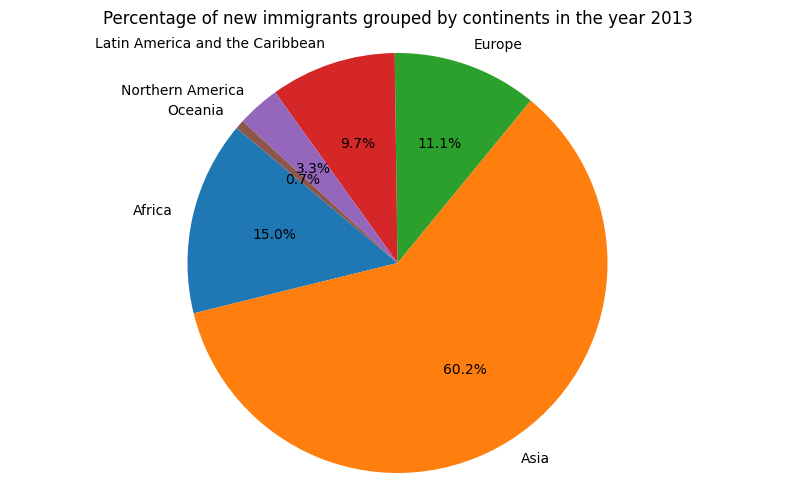

In [28]:
### type your answer here
df2013 = df_can[['Continent', '2013']]
dfcontinent = df2013.groupby('Continent').sum()

plt.figure(figsize=(10, 6))
plt.pie(dfcontinent['2013'],
        labels=dfcontinent.index,
        autopct='%1.1f%%',
        startangle=140)

plt.title('Percentage of new immigrants grouped by continents in the year 2013')

plt.axis('equal')
plt.show()

**Question 2:** Compare the distribution of the number of immigrants from Pakistan and Afghanistan from 1980 to 2013.

Step 1: Get the dataset for Pakistan and Afghanistan and call the dataframe **df_PA**.

In [29]:
### type your answer here
df_PA = df_can.loc[['Pakistan', 'Afghanistan'], '1980':'2013']

print(df_PA)

             1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                                  ...   
Pakistan      978   972  1201   900   668   514   691  1072  1334  2261  ...   
Afghanistan    16    39    39    47    71   340   496   741   828  1076  ...   

              2004   2005   2006   2007  2008  2009  2010  2011   2012   2013  
Country                                                                        
Pakistan     13399  14314  13127  10124  8994  7217  6811  7468  11227  12603  
Afghanistan   2978   3436   3009   2652  2111  1746  1758  2203   2635   2004  

[2 rows x 34 columns]


Step 2: Plot data.

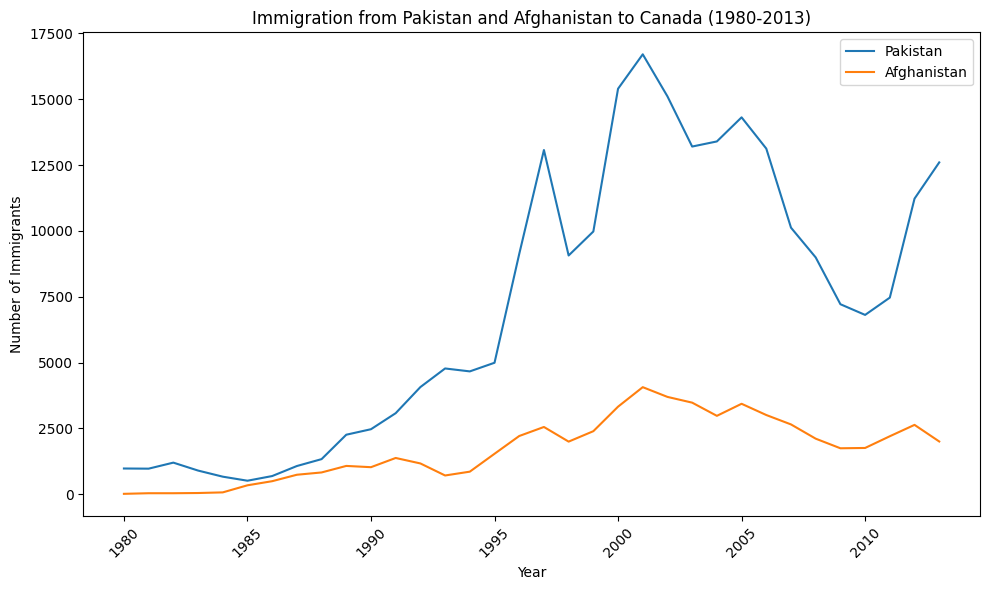

In [30]:
### type your answer here
df_PA = df_PA.transpose()

plt.figure(figsize=(10, 6))
for country in df_PA.columns:
    plt.plot(df_PA.index.astype(int),
             df_PA[country],
             label=country)

plt.title('Immigration from Pakistan and Afghanistan to Canada (1980-2013)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

**Question 3**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

Step 1: Get the data:
   1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
   2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
   3. Reset the index in place.
   4. Rename the columns to **year** and **total**.
   5. Display the resulting dataframe.

In [31]:
### type your answer here
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], '1980':'2013']

df_total = pd.DataFrame(df_countries.sum(axis=0))
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']

df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


Step 2: Generate the scatter plot by plotting the total versus year in **df_total**.

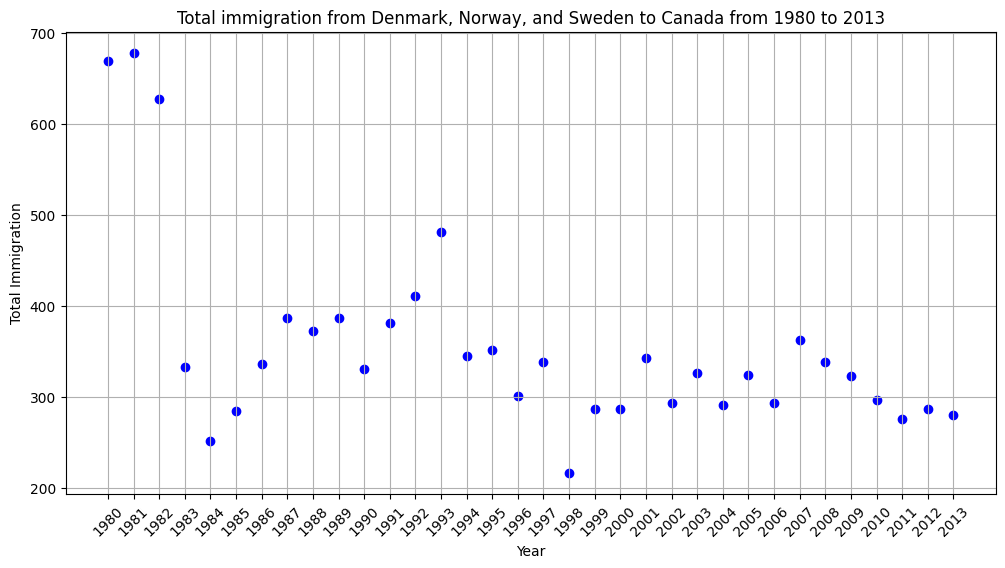

In [32]:
### type your answer here
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
plt.scatter(df_total['year'], df_total['total'], color='blue')

plt.title('Total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Total Immigration')

plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**Question 4**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

Step 1: Normalize the data pertaining to China and India.

In [33]:
### type your answer here
df_CI = df_can.loc[['China', 'India'], '1980':'2013']
df_CI_normalized = (df_CI - df_CI.min()) / (df_CI.max() - df_CI.min())
df_CI_normalized.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
India,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Step 2: Generate the bubble plots.

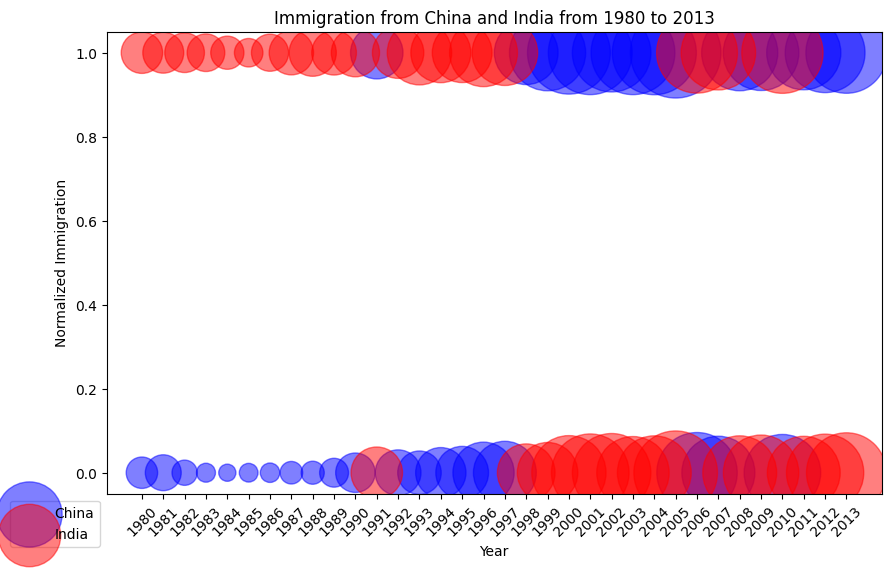

In [34]:
### type your answer here
plt.figure(figsize=(10, 6))

scaling_factor = 0.1

plt.scatter(df_CI_normalized.columns, df_CI_normalized.loc['China'], s=df_CI.loc['China']*scaling_factor, color='blue', alpha=0.5, label='China')

plt.scatter(df_CI_normalized.columns, df_CI_normalized.loc['India'], s=df_CI.loc['India']*scaling_factor, color='red', alpha=0.5, label='India')

plt.title('Immigration from China and India from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Normalized Immigration')
plt.xticks(rotation=45)


plt.legend(bbox_to_anchor=(0, 0))

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).